<div style="width:90%; text-align:center; border-width: 0px; display:block; margin-left:auto; margin-right:auto;">
<div class="alert alert-block alert-success" style="text-align:center; color:navy;">
<img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/logo_unb.png" style="width: 200px; opacity:0.85;">
<h1>Universidade de Brasília</h1>
<h2>Instituto de Física</h2>
<hr style="width:44%;border:1px solid navy;">
<h3>Métodos Computacionais A (MCA)</h3> 
<h4>Prof. Bernhard Enders</h4>
<hr style="width:44%;border:1px solid navy;">
</div>
</div>

# **➲ Aula 09 - Integração Numérica**

## ➥ O problema da integração analítica
---

A integral definida, para uma função contínua $f$ em um  intervalo [a,b], é dada por:

$$
\int_a^b f(x)\,\text{d}x = F(b) - F(a),
$$

na qual

$$
f(x) = \frac{\text{d}F(x)}{\text{d}x}. 
$$

O grande problema desse procedimento é que precisamos obter uma forma analítica para a antiderivada/primitiva $F(x)$ e muitas vezes isso não é uma tarefa fácil e algumas vezes até mesmo impossível. 

Se ao invés de obter uma solução exata (forma analítica) buscarmos valores aproximados de $F(x)$, então teremos um problema relativamente fácil de resolver, chamado de **integração numérica**.


## Somas de Riemann e integração numérica
---

A integral definida de uma função contínua $f$ sobre o intervalo [a,b], expressa por $\int_a^b f(x)\text{d}x$, também pode ser definida como o limite de uma soma de Riemann quando o número de subdivisões se aproxima do infinito. Ou seja,

$$
I = \int_a^b f(x)\,\text{d}x = \lim_{n\to∞}\sum_{i=1}^n f(x_i^*)(x_i - x_{i-1})
$$

na qual $n$ é o número de subintervalos/subdivisões e os pontos (de integração) $x_i^*$ podem ser escolhidos de diversas formas, desde que $x_{i-1}\leq x_{i}^{*} \leq x_{i}$.

Chamamos a quantidade $(x_i - x_{i-1})$ de **passo da malha**, que é geralmente representado por $\Delta x$ ou $h$. Assim, temos que

$$
\begin{align*}
\Delta x &= x_i - x_{i-1} \\
&= \frac{b-a}{n}.
\end{align*}
$$

De modo que 

$$
I = \lim_{n\to∞}\sum_{i=1}^n f(x_i^*)\Delta x.
$$

### Tipos de somas de Riemann

Escolhas específicas do conjunto de pontos $x_{i}^{*}$ nos dão diferentes tipos de soma de Riemann:

- Soma de Riemann à **esquerda**: Se $x_{i}^{*}=x_{i-1}$, $∀i ∈ \{0,\ldots,n-1\}$;
- Soma de Riemann à **direita**: Se $x_{i}^{*}=x_{i}$, $∀i ∈ \{1,\ldots,n\}$;
- Soma de Riemann **média**: Se $x_{i}^{*}=\frac{1}{2}(x_{i-1}+x_{i})$, $∀i ∈ \{0,\ldots,n\}$;
- Soma de Riemann **trapezoidal**: corresponde à média aritmética entre a soma à esquerda e a soma à direita.
- Soma de Riemann **superior**: $x_{i}^{*}$ é escolhido tal que $f(x_i^*) = \max(f(x_{i-1}), f(x_{i}))$
- Soma de Riemann **inferior**: $x_{i}^{*}$ é escolhido tal que $f(x_i^*) = \min(f(x_{i-1}), f(x_{i}))$

**NOTA 1**: Qualquer soma de Riemann em dada partição — isto é, qualquer soma obtida pela escolha de $x_{i}^{*}$ entre $\displaystyle x_{i-1}$ e $\displaystyle x_{i}$ —  está compreendida entre os valores obtidos pelas somas de Riemann superior e inferior. 

**NOTA 2**: Uma função é definida como integrável por Riemann se as somas inferior e superior forem se aproximando conforme a partição se afina. Este fato pode ser também usado para a integração numérica.

<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Riemann_sum_convergence.png" width="500" align="center"/>
  <p style="text-align:center; font-style:italic;">
    Representação gráfica dos diversos tipos de somas de Riemann.
  </p> 
  </center>
</div>


## Soma de Riemann à esquerda
---

Na soma de Riemann à esquerda, aproxima-se a função pelo seu valor no ponto final à esquerda, dando múltiplos retângulos com base $Δx ≡ h$ e altura $f(x_i)$. Tomando  $i = 0, 1, ... n-1$ e adicionando as áreas, temos então a seguinte aproximação para a integral definida.

$$
I_\text{esq} ≈ h[f(a)+f(a+h)+f(a+2h)+...+f(b-h)].
$$

Note que $x_0=a, x_1 = a+h, x_2=a+2h,\ldots$, de modo que podemos construir todos os pontos da malha com a seguinte relação de recorrência:

$$
x_i = a + ih, \forall i \in \{ 0,1,\ldots,n-1\}
$$

<br>
<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/19/Riemann_sum_%28leftbox%29.gif" align="center"/>
  <p style="text-align:center; font-style:italic;">
    Animação da soma de Riemann à esquerda para valores crescentes de $n$.
  </p> 
  </center>
  <!--https://upload.wikimedia.org/wikipedia/commons/c/c9/LeftRiemann2.svg-->
</div>


A soma de Riemann à esquerda resulta em uma superestimação se $f$ está monotonicamente decrescendo nesse intervalo, e em uma subestimação se $f$ está monotonicamente crescendo.


## Soma de Riemann à direita
---

Nessa soma, aproxima-se $f$ de seu valor no ponto à direita de cada subintervalo. São gerados, então, múltiplos retângulos de base $h$ e altura $f(a + ih)$. Tomando para $i = 1,2,...,n$ e adicionando as áreas resultantes se produz

$$
\begin{align*}
I_\text{dir} &≈ h\left[f(a+h)+f(a+2h)+...+f(b)\right]\\
  &≈ h\left[f(x_1)+f(x_2)+...+f(x_n)\right].\\
\end{align*}
$$

<br>
<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/61/Riemann_sum_%28rightbox%29.gif" align="center"/>
  <p style="text-align:center; font-style:italic;">
    Animação da soma de Riemann à direita para valores crescentes de $n$.
  </p> 
  </center>
  <!--https://upload.wikimedia.org/wikipedia/commons/4/45/RightRiemann2.svg-->
</div>

A soma de Riemann à direita resulta em uma subestimação se $f$ está monotonicamente decrescendo, e uma superestimação se $f$ está monotonicamente crescendo. 

## Soma de Riemann média
---
Aqui, aproximamos $f$ no ponto médio dos intervalos,  expressamos $f(a+h/2)$ para o primeiro intervalo, para o próximo temos $f(a+3h/2)$ e assim por diante, até $f(b-h/2)$. Somando as áreas temos

$$
I_\text{med} ≈ {\displaystyle h\left[f(a+{\frac {h}{2}})+f(a+{\frac {3h}{2}})+...+f(b-{\frac {h}{2}})\right].}
$$

Este esquema é equivalente ao método de integração numérica chamado de **Método do Ponto Médio**, que corresponde à soma de áreas de retângulos de bases iguais a $h$ e alturas $f(\bar x_i)$, com $\bar x_i = \frac{1}{2}(x_{i-1}+x_i)$.

<br>
<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Riemann_sum_%28middlebox%29.gif" align="center"/>
  <p style="text-align:center; font-style:italic;">
    Animação da soma de Riemann média para valores crescentes de $n$.
  </p> 
  </center>
  <!--https://upload.wikimedia.org/wikipedia/commons/d/d2/MidRiemann2.svg-->
</div>




## Soma de Riemann trapezoidal
---

Nesse caso, os valores da função $f$ no intervalo são aproximados pela média aritmética dos valores finais das somas de Riemann à direita e à esquerda. Dessa mesma maneira, temos que 

$$
I_\text{trap} = \frac{1}{2}(I_\text{esq} + I_\text{dir}),
$$

o que resulta em:

$$
\begin{align*}
I_\text{trap} &≈ \frac{1}{2}\left\{h[f(a)+f(a+h)+f(a+2h)+...+f(b-h)] + h[f(a+h)+f(a+2h)+...+f(b)]\right\}\\
&≈ \frac{h}{2}\left[f(a)+2f(a+h)+2f(a+2h)+...+2f(b-h)+f(b)\right] 
\end{align*}
$$

Como $x_i = a + ih,\ \forall i \in \{0,1,\ldots,n\}$, reescrevemos:

$$
\begin{align*}
I_\text{trap} &≈ \frac{h}{2}\left[f(x_0)+2f(x_1)+2f(x_2)+...+2f(x_{n-1})+f(x_n)\right]\\
  &≈ \frac{h}{2}\left[f(a) + 2\sum_{i=1}^{n-1}f(x_i) + f(b)\right].
\end{align*}
$$

<div class="alert alert-block alert-info"> 
  <b>💡NOTA:</b> Esta fórmula coincide com a chamada regra do trapézio para integração numérica, na qual utiliza-se um polinômio interpolador de Lagrange de primeiro grau (uma reta) para aproximar os valores de $f(x_i)$ em cada intervalo $[x_{i-1},x_i]$.  
</div>

<br>
<div style="margin:auto; text-align:center; width:75%; background-color:white">
  <center>
  <img src="https://upload.wikimedia.org/wikipedia/commons/7/76/TrapRiemann2.svg" align="center"/>
  <p style="text-align:center; font-style:italic;">
    Representação gráfica de uma soma de Riemann trapezoidal.
  </p> 
  </center>
</div>

## Implementações e testes em Python
Para testar nossa implementação vamos utilizar uma integral definida simples e bem conhecida:

$$
I = \int_0^{π/2} \text{sen}(x) \, \text{d}x = 1
$$

Note — veja figura abaixo — que esta função é monótona crescente no intervalo [0,1]. Assim, esperamos uma subestimação do valor da integral para a soma de Riemann à esquerda e uma superestimação para a soma de Riemann à direita.

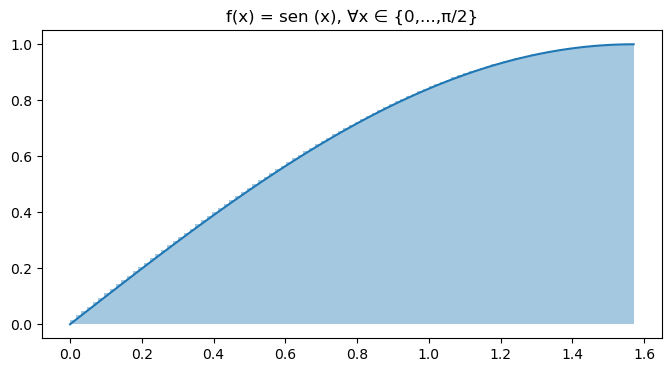

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, math.pi/2, 100)
y = np.sin(x)

plt.figure(figsize=(8, 4), dpi=100)
plt.fill_between(x, y, step="pre", alpha=0.4)
plt.title('f(x) = sen (x), ∀x ∈ {0,...,π/2}')
plt.plot(x, y)
plt.show()


Vamos fixar nossa função teste, o intervalo de integração para todos os casos:

In [2]:
# nossa função teste
def f(x): return math.sin(x)


# intervalo
a, b = 0, 0.5*math.pi


Vamos utilizar a seguinte função auxiliar para mostrar os resultados obtidos pelos diferentes métodos juntamente com os seus erros e taxa de convergência em função de $n$ (ou $h$):

In [3]:
import pandas as pd


def resultados(metodo, funcao, intervalo, valor_exato):
    '''função auxiliar para mostrar os resultados obtidos 
        pelos diferentes métodos juntamente com os seus erros 
        e taxa de convergência.
    '''
    # pontos extremos do intervalo de integração
    a, b = intervalo

    # número de subintervalos variável de 4 (2^2) a 256 (2^8)
    ns = [2**i for i in range(2, 9)]

    lst = []
    for n in ns:
        # solução aproximada
        aprox = metodo(funcao, a, b, n)

        # erro absoluto
        erro = valor_exato - aprox

        # erro percentual
        erro_perc = 100*abs(erro)/valor_exato

        # agrega tudo em uma lista para exibir em uma tabela (dataframe)
        lst.append([aprox, erro, erro_perc])

    # exibe uma tabela com os resultados
    df = pd.DataFrame(data=lst, columns=[
                      'aproximado', 'erro', 'percentual'], index=ns)
    df['dif_erro'] = df.erro.shift()/df.erro
    display(df)
    print(
        f'Tabela: erro e taxa de convergência do método "{metodo.__name__}" para diversos valores de n.')



Agora estamos prontos para realizar algumas implementações ingênuas das somas de Riemann utilizadas para aproximar a integral definida de uma função $f$ no intervalo $[a,b]$ contendo $n$ subintervalos. O teste/validação de cada implementação é feito na sequência de cada definição/função.

In [4]:
def riemann_esq(f, a, b, n):
    """Aproximação do valor da integral definida de uma função f 
       no intervalo [a,b] utilizando o método da soma de Riemann 
       à esquerda.

    Args:
      f (callable): função a ser integrada.
      a (float): início do intervalo de integração.
      b (float): fim do intervalo de integração.
      n (int): número de subintervalos utilizados na soma.

    Returns:
      float: valor da soma/integral.
    """
    h = (b - a)/n
    soma = 0.0
    for i in range(0, n):
        xi = a + i*h
        soma = soma + f(xi)

    return h*soma


In [5]:
# teste/validação da soma de Riemann à esquerda
resultados(riemann_esq, f, (a, b), 1)


,aproximado,erro,percentual,dif_erro
4,0.790766,0.209234,20.923374,NaN
8,0.898610,0.101390,10.138960,2.063661
16,0.950109,0.049891,4.989070,2.032234
32,0.975256,0.024744,2.474450,2.016234
64,0.987678,0.012322,1.232205,2.008148
128,0.993852,0.006148,0.614847,2.004082
256,0.996929,0.003071,0.307110,2.002043


Tabela: erro e taxa de convergência do método "riemann_esq" para diversos valores de n.


In [6]:
def riemann_dir(f, a, b, n):
    """Aproximação do valor da integral definida de uma função f 
       no intervalo [a,b] utilizando o método da soma de Riemann 
       à direita.

    Args:
      f (callable): função a ser integrada.
      a (float): início do intervalo de integração.
      b (float): fim do intervalo de integração.
      n (int): número de subintervalos utilizados na soma.

    Returns:
      float: valor da soma/integral.
    """
    h = (b - a)/n
    soma = 0.0
    for i in range(1, n+1):
        xi = a + i*h
        soma = soma + f(xi)

    return h*soma


In [7]:
# teste da soma de Riemann à direita
resultados(riemann_dir, f, (a, b), 1)


,aproximado,erro,percentual,dif_erro
4,1.183465,-0.183465,18.346534,NaN
8,1.094960,-0.094960,9.495994,1.932029
16,1.048284,-0.048284,4.828407,1.966693
32,1.024343,-0.024343,2.434289,1.983498
64,1.012222,-0.012222,1.222165,1.991785
128,1.006123,-0.006123,0.612337,1.995901
256,1.003065,-0.003065,0.306482,1.997953


Tabela: erro e taxa de convergência do método "riemann_dir" para diversos valores de n.


In [8]:
def riemann_med(f, a, b, n):
    """Aproximação do valor da integral definida de uma função f 
       no intervalo [a,b] utilizando o método da soma de Riemann 
       média.

    Args:
      f (callable): função a ser integrada.
      a (float): início do intervalo de integração.
      b (float): fim do intervalo de integração.
      n (int): número de subintervalos utilizados na soma.

    Returns:
      float: valor da soma/integral.
    """
    h = (b - a)/n
    soma = 0.0
    for i in range(0, n):
        xi = a + h*(i + 0.5)
        soma = soma + f(xi)

    return h*soma


In [9]:
# teste da soma de Riemann média
resultados(riemann_med, f, (a, b), valor_exato=1)


,aproximado,erro,percentual,dif_erro
4,1.006455,-0.006455,0.645454,NaN
8,1.001608,-0.001608,0.160819,4.013547
16,1.000402,-0.000402,0.040171,4.003377
32,1.000100,-0.000100,0.010041,4.000844
64,1.000025,-0.000025,0.002510,4.000211
128,1.000006,-0.000006,0.000627,4.000053
256,1.000002,-0.000002,0.000157,4.000013


Tabela: erro e taxa de convergência do método "riemann_med" para diversos valores de n.


In [10]:
def riemann_trap(f, a, b, n):
    """Aproximação do valor da integral definida de uma função f 
       no intervalo [a,b] utilizando a média aritmética das somas
       de Riemann esquerda e direita. 

    Args:
      f (callable): função a ser integrada.
      a (float): início do intervalo de integração.
      b (float): fim do intervalo de integração.
      n (int): número de subintervalos utilizados na soma.

    Returns:
      float: valor da soma/integral.
    """

    return 0.5*(riemann_esq(f, a, b, n) + riemann_dir(f, a, b, n))


In [11]:
# teste da soma de Riemann trapezoidal
resultados(riemann_trap, f, (a, b), valor_exato=1)


,aproximado,erro,percentual,dif_erro
4,0.987116,0.012884,1.288420,NaN
8,0.996785,0.003215,0.321483,4.007741
16,0.999197,0.000803,0.080332,4.001930
32,0.999799,0.000201,0.020081,4.000482
64,0.999950,0.000050,0.005020,4.000120
128,0.999987,0.000013,0.001255,4.000030
256,0.999997,0.000003,0.000314,4.000008


Tabela: erro e taxa de convergência do método "riemann_trap" para diversos valores de n.


Outra implementação equivalente, porém mais eficiente, da soma trapezoidal seria utilizar a fórmula simplificada da área do triângulo ao invés de calcular duas somas de Riemann:

In [12]:
def riemann_trap2(f, a, b, n):
    """Aproximação do valor da integral definida de uma função f 
       no intervalo [a,b] utilizando o método da soma de Riemann 
       trapezoidal.

    Args:
      f (callable): função a ser integrada.
      a (float): início do intervalo de integração.
      b (float): fim do intervalo de integração.
      n (int): número de subintervalos utilizados na soma.

    Returns:
      float: valor da soma/integral.
    """

    h = (b - a)/n
    soma = f(a) + f(b)
    for i in range(1, n):
        xi = a + i*h
        soma = soma + 2*f(xi)

    return 0.5*h*soma


In [13]:
# teste da soma de Riemann trapezoidal
resultados(riemann_trap2, f, (a, b), valor_exato=1)


,aproximado,erro,percentual,dif_erro
4,0.987116,0.012884,1.288420,NaN
8,0.996785,0.003215,0.321483,4.007741
16,0.999197,0.000803,0.080332,4.001930
32,0.999799,0.000201,0.020081,4.000482
64,0.999950,0.000050,0.005020,4.000120
128,0.999987,0.000013,0.001255,4.000030
256,0.999997,0.000003,0.000314,4.000008


Tabela: erro e taxa de convergência do método "riemann_trap2" para diversos valores de n.


Algumas observações importantes:
  - note que o valor aproximado (e, consequentemente, o erro) usando a fórmula do trapézio é igual ao valor obtido usando a média aritmética das somas de Riemann. 
  - o erro do esquema trapezoidal é o dobro do erro obtido com a soma de Riemaan média (método do ponto médio).

## Método de Integração de Romberg
---

O método de Romberg é um algoritmo projetado para construir quadraturas de alta ordem a partir do método dos trapézios. Para tanto, o método utiliza a extralação de Richardson. 

A extrapolação de Richardson é usada para gerar resultados de alta precisão mediante fórmulas de ordens menores. A extrapolação pode ser aplicada sempre que uma técnica de aproximação é conhecida por ter um termo de erro com um formato previsível, que depende de um parâmetro, normalmente o tamanho do passo $h$. 

Para aproximar a integral $\int_a^b f(x)\,\text{d}x$, usamos os resultados da regra composta trapezoidal com $n = 1, 2, 4, 8, 16,\ldots$, e indicamos as aproximações resultantes, respectivamente por $F_{1,1}$, $F_{2,1}$, $F_{3,1}$ e assim por diante. Em seguida, aplicamos uma extrapolação conforme a ordem desejada para a aproximação, para  $\mathcal O(h^4)$, temos que:

$$
F_{k,2} = F_{k,1} + \frac{1}{3}\left(F_{k,1} − F_{k−1,1}\right),\quad \forall k = 2,3,\ldots
$$

Assim, as aproximacões $F_{3,3}$, $F_{4,3}$, $F_{5,3}$ de ordem $\mathcal O(h^6)$, podem ser obtidas mediante

$$
F_{k,3} = F_{k,2} + \frac{1}{15}\left(F_{k,2} − F_{k−1,2}\right),\quad \forall k = 3,4,\ldots
$$

## Exemplo prático
---

Como exemplo, utilizaremos o caso de um móvel partindo do repouso e ganhando velocidade rapidamente, tal que sua função horário da velocidade seja dada por (com $t$ em segundos e $v$ em m/s):

$$
v(t) = 3t^2e^{t^3}.
$$

Gostaríamos de saber qual a posição do móvel em determinado instante $T$ (em segundos), ou seja, precisamos computar

$$
\int_0^T v(t)\,\text{d}t = \int_0^T 3t^2e^{t^3}\,\text{d}t.
$$

Felizmente, nesse caso, a primitiva pode ser facilmente obtida e é dada por 

$$
\int_0^T 3t^2e^{t^3}\,\text{d}t = \left[e^{t^3}\right]_0^T
$$

Assim, para $T=1$ s, temos que a posição da partícula (em metros) é igual a 

$$
\left[e^{t^3}\right]_0^1 = 1,71828...
$$



Como sabemos, calcular a integral definida de uma função $f(x)$ é equivalente a computar a área compreendida entre o gráfico de $y=f(x)$ e o eixo $x$ entre os pontos $a$ e $b$, é o que mostra a figura abaixo para o nosso exemplo.

<br>
<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/integralarea.png" align="center"/>
  <p style="text-align:center; font-style:italic;">
    A integral definida corresponde ao valor da área abaixo do gráfico.
  </p> 
  </center>
</div>

## Resolução do exemplo

A ideia básica da integração numérica via regra do trapézio é dividir a área desejada em subintervalos interligadas por linhas retas (interpolação de Lagrange linear). Em nosso caso, teríamos algo assim:

<br>
<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/integralarea2.png" align="center"/>
  <p style="text-align:center; font-style:italic;">
    Aproximação da área por meio da regra trapezoidal.
  </p> 
  </center>
</div>
<br>

Vejamos o quão boa é esta aproximação para diversos valores de $n$. Para tanto, vamos comparar o resultado aproximado com o valor exato para diversos valores crescentes de $n$ (ou decrescentes de $h$). 

In [14]:
from numpy import exp


def velocidade(t):
    '''velocidade em função do tempo'''
    return 3*(t**2)*exp(t**3)


def analitica(a, b):
    '''valor exato da integral no intervalo [a,b]'''
    return exp(b**3) - exp(a**3)


In [15]:
# intervalo
a = 0
b = 1

# valor exato
exato = analitica(a, b)

# solução via trapézio
resultados(riemann_trap, velocidade, (a, b), exato)


,aproximado,erro,percentual,dif_erro
4,1.922717,-0.204435,11.897636,NaN
8,1.770846,-0.052564,3.059109,3.889249
16,1.731521,-0.013239,0.770499,3.970294
32,1.721598,-0.003316,0.192990,3.992432
64,1.719111,-0.000829,0.048270,3.998099
128,1.718489,-0.000207,0.012069,3.999524
256,1.718334,-0.000052,0.003017,3.999881


Tabela: erro e taxa de convergência do método "riemann_trap" para diversos valores de n.


Note que a convergência do método é quadrática, isto é, que o erro quadruplica quando $n$ dobra (ou quando $h$ cai pela metade). Isso significa que o erro de truncamento desse método é de ordem $\mathcal O(h^2)$. Mais precisamente, o erro de truncamento no método dos trapézios é dado por:

$$
\varepsilon_\text{trap} = -\frac{(b-a)f''(\mu)}{12}h^2, \quad\forall\mu\in [a,b].
$$

Vamos agora verificar que o método do ponto médio (soma de Riemann média) também possui convergência quadrática porém nos dá um erro ligeiramente menor (metade em relação ao método do trapézio), ou seja:

$$
\varepsilon_\text{med} = -\frac{(b-a)f''(\mu)}{24}h^2, \quad\forall\mu\in [a,b].
$$

In [16]:
# solução via trapézio
resultados(riemann_med, velocidade, (a, b), exato)

,aproximado,erro,percentual,dif_erro
4,1.618975,0.099307,5.779418,NaN
8,1.692196,0.026085,1.518110,3.806981
16,1.711675,0.006607,0.384519,3.948073
32,1.716625,0.001657,0.096449,3.986759
64,1.717867,0.000415,0.024132,3.996673
128,1.718178,0.000104,0.006034,3.999167
256,1.718256,0.000026,0.001509,3.999792


Tabela: erro e taxa de convergência do método "riemann_med" para diversos valores de n.


### Otimizando o código via vetorização

A performance de códigos que utilizam comandos de repetição em Python tende a ser baixa quando comparada com linguagens compiladas de alto desempenho (leia-se: Fortran ou C/C++). 

Por esse motivo, buscamos otimizar, sempre que possível, nosso código em Python reescrevendo-o sem loops. Tal técnica é chamada de **vetorização**. 

Vamos vetorizar nossas somas de Riemann e verificar qual ganho de desempenho obteremos. Para tanto, note que a nossa malha $x_i = a + ih$ é igualmente espaçada e foi produzida (dentro de um loop) com comandos da seguinte forma:

In [17]:
n = 4
h = (b - a)/n
for i in range(0, n):
    xi = a + i*h
    print(xi, end=' , ')


0.0 , 0.25 , 0.5 , 0.75 , 

Note que os valores $x_i$ são sobrescritos a cada iteração. Podemos armazenar todos os valores $x_i$ sem a necessidade de um loop (explícito) com o comando:

In [18]:
from numpy import linspace

xi = linspace(a, b, n, endpoint=False)
xi


array([0.  , 0.25, 0.5 , 0.75])

Com isso trocamos memória por desempenho. Isto é, utilizamos mais memória (por armazenar todos os valores $x_i$) mas ganhamos desempenho ao executar várias instruções por vez. 
Para compara a performance (e a correção) da versão otimizada, utilizaremos a seguinte função:

In [19]:
def compara_versoes(f1, f2, a, b, n):
    '''Compara os resultados e a performance de duas versões de uma função.'''
    exata = analitica(a, b)
    aprox = f1(velocidade, a, b, n)
    aprox_opt = f2(velocidade, a, b, n)
    print('exata =', exata)
    print('aprox =', aprox)
    print('optim =', aprox_opt)
    # comparação de tempo de execução
    t = %timeit -o -q f1(velocidade, a, b, 512)
    topt = %timeit -o -q f2(velocidade, a, b, 512)
    print('ganho = {:.2f}x'.format(t.average/topt.average))


Seguem as implementações otimizadas/vetorizadas:

In [20]:
from math import fsum


def riemann_esq_opt(f, a, b, n):
    '''Versão otimizada via vetorização da soma de Riemann.'''
    xi = linspace(a, b, n+1)
    res = fsum(f(xi[:-1]))
    return (xi[1] - xi[0])*res


In [21]:
compara_versoes(riemann_esq, riemann_esq_opt, a, b, 512)


exata = 1.718281828459045
aprox = 1.7103310739104152
optim = 1.7103310739104152
ganho = 7.03x


In [22]:
def riemann_dir_opt(f, a, b, n):
    '''Versão otimizada via vetorização da soma de Riemann.'''
    xi = linspace(a, b, n+1)
    res = fsum(f(xi[1:]))
    return (xi[1] - xi[0])*res


In [23]:
compara_versoes(riemann_dir, riemann_dir_opt, a, b, 512)


exata = 1.718281828459045
aprox = 1.7262585064990423
optim = 1.7262585064990423
ganho = 6.95x


In [24]:
def riemann_med_opt(f, a, b, n):
    '''Versão otimizada via vetorização da soma de Riemann.'''
    h = (b - a)/n
    xi = linspace(a+h/2, b-h/2, n)
    res = fsum(f(xi))
    return h*res


In [25]:
compara_versoes(riemann_med, riemann_med_opt, a, b, 512)


exata = 1.718281828459045
aprox = 1.7182753475982557
optim = 1.7182753475982557
ganho = 7.16x



<div class="alert alert-block alert-info">
  <b>🖉 Tarefa:</b> 
  Implementar a versão otimizada da soma de Riemann trapezoidal.
</div>